<h1 style="text-align: center;"> Titanic Survival Analysis Using Python</h1>
<em>The <strong>TITANIC</strong> was one of the largest and most luxurious ships of its time. It carried over two thousand passengers and crew members on its maiden voyage from <strong>Southampton to New York</strong>. Tragically, the ship struck an iceberg and sank, leading to <strong>one of the deadliest maritime disasters in history</strong>.</em>

<h1><u>IMPORTING</u></h1>




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<u><strong>data = pd.read_csv("Downloads/titanic.csv")</strong></u>

This line reads the Titanic dataset from a CSV file located in the **Downloads** folder and stores it in a pandas DataFrame named `data`.  
- `pd.read_csv()` is a pandas function used to load data from a CSV file.  
- `"Downloads/titanic.csv"` is the relative path to the file.  
- The resulting `data` object allows you to explore, analyze, and manipulate the dataset using pandas tools.

This table contains detailed information about Titanic passengers, including demographics, ticketing, and survival status.
- **PassengerId**: A unique identifier assigned to each passenger.
- **Survived**: Indicates survival status — `0` means the passenger did not survive, `1` means they did.
- **Pclass**: Passenger class — `1` for First Class, `2` for Second Class, and `3` for Third Class.
- **Name**: Full name of the passenger, often includes titles like Mr., Mrs., Miss.
- **Sex**: Gender of the passenger — either `male` or `female`.
- **Age**: Age of the passenger in years.
- **SibSp**: Number of siblings or spouses aboard the Titanic with the passenger.
- **Parch**: Number of parents or children aboard the Titanic with the passenger.
- **Ticket**: Ticket number. May be shared among passengers traveling together.
- **Fare**: Amount paid for the ticket. Can reflect socioeconomic status.
- **Cabin**: Cabin number where the passenger stayed. 
- **Embarked**: Port of embarkation — `C` for Cherbourg, `Q` for Queenstown, `S` for Southampton.

In [2]:
data=pd.read_csv("Downloads/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Observation: Reading the Dataset

- Used `pd.read_csv("Downloads/titanic.csv")` to load the Titanic dataset into a pandas DataFrame.
- This step imports the data into memory, making it accessible for analysis.
- It confirms that the file path is correct and the dataset is ready for inspection.



In [3]:
data.shape

(891, 12)

## Observation: Checking Dataset Dimensions

- Used `data.shape` to find the number of rows and columns in the dataset.
- Helps understand the scale of the data (e.g., 891 rows and 12 columns).
- Useful for estimating memory usage and planning preprocessing steps.



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Observation: Viewing Dataset Summary

- Used `data.info()` to get a concise overview of the dataset.
- Reveals column names, data types, and non-null counts.
- Helps identify missing values and understand the structure of each column.



In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Observation: Inspecting Data Types

- Used `data.dtypes` to check the type of data in each column.
- Distinguishes between numerical (`int64`, `float64`) and categorical (`object`) features.
- Guides how each column should be processed (e.g., encoding, scaling).


In [6]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Observation: Previewing Sample Data

- Used `data.head(5)` to view the first five rows of the dataset.
- Confirms that the data loaded correctly and shows sample values.
- Helps spot formatting issues, missing values, or unusual entries early on.


In [7]:
data.duplicated().value_counts()

False    891
Name: count, dtype: int64

## Observation: Checking Duplicate Rows

- Used `data.duplicated().value_counts()` to count how many rows in the dataset are duplicates.
- Returns a count of `True` (duplicate rows) and `False` (unique rows).
- Helps identify data quality issues — if duplicates exist, they may need to be removed before analysis.

In [8]:
missing=data.isnull().sum()
missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Observation: Identifying Missing Values

- Used `data.isnull().sum()` to calculate the total number of missing (null) values in each column.
- Assigned the result to a variable named `missing`, then printed it to view the count.
- Helps identify which columns need attention for data cleaning, such as imputation or removal.

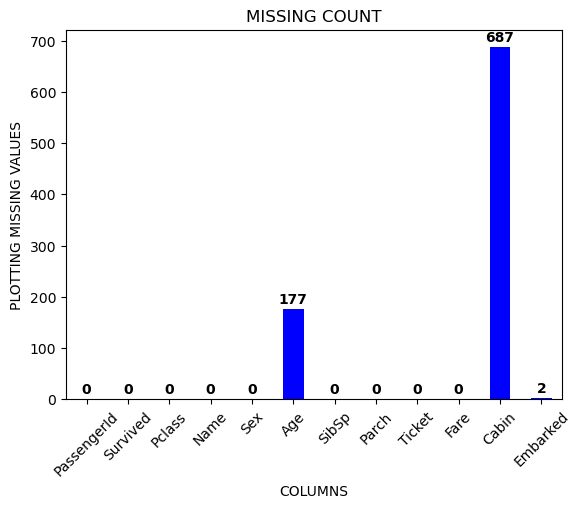

In [11]:
x=missing.plot(kind="bar",color="blue")
plt.xlabel("COLUMNS")
plt.ylabel("PLOTTING MISSING VALUES")
plt.title("MISSING COUNT")
plt.xticks(rotation=45)
for index,value in enumerate(missing):
    plt.text(index,value+5,str(value),ha="center",va="bottom",fontsize=10,fontweight="bold")
plt.show()

## Observation: Visualizing Missing Values

- Plotted a bar chart using `missing.plot(kind="bar", color="red")` to show the count of missing values per column.
- Added axis labels, title, and rotated x-axis ticks for better readability.
- Annotated each bar with the exact missing count using `plt.text()` to make the chart more informative.

In [10]:
data=data.drop(columns="Cabin")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Observation: Dropping the 'Cabin' Column

- Used `data.drop(columns="Cabin")` to remove the 'Cabin' column from the dataset.
- Assigned the result back to `data`, updating the DataFrame without the dropped column.
- This step is useful when a column has too many missing values or is not relevant for analysis.

In [12]:
Age=data["Age"]=data["Age"].fillna(data["Age"].median())
Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

## Observation: Handling Missing Values in 'Age' Column

- Used `data["Age"].fillna(data["Age"].median())` to replace missing values in the 'Age' column with the median age.
- Assigned the cleaned column back to both `data["Age"]` and a variable named `Age`.
- This approach preserves the distribution of the data and avoids distortion caused by extreme values (compared to using mean).

In [13]:
Embarked=data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode()[0])
Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

## Observation: Handling Missing Values in 'Embarked' Column

- Used `data["Embarked"].fillna(data["Embarked"].mode()[0])` to fill missing values with the most frequent category (mode).
- Assigned the cleaned column back to both `data["Embarked"]` and a variable named `Embarked`.
- This method preserves the dominant category and avoids introducing bias from rare or unknown values.

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Observation: Rechecking Missing Values

- Used `data.isnull().sum()` to count missing values in each column after handling 'Age' and 'Embarked'.
- Confirms whether any columns still contain null entries.
- Helps verify that previous cleaning steps were successful and identify if further action is needed.

In [15]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Observation: Displaying the Cleaned Dataset

- Used `data` to print the current state of the DataFrame after cleaning steps.
- Shows updated columns with missing values handled and 'Cabin' column removed.
- Helps verify that previous transformations (like filling 'Age' and 'Embarked') were applied correctly.

In [16]:
Survived=data.groupby("Sex")["Survived"].sum()
Survived

Sex
female    233
male      109
Name: Survived, dtype: int64

## Observation: Survival Count by Gender

- Used `data.groupby("Sex")["Survived"].sum()` to calculate the total number of survivors grouped by gender.
- Assigned the result to a variable named `Survived` and displayed it to compare male vs female survival counts.
- Helps reveal gender-based survival patterns — typically showing higher survival rates among females in the Titanic dataset.

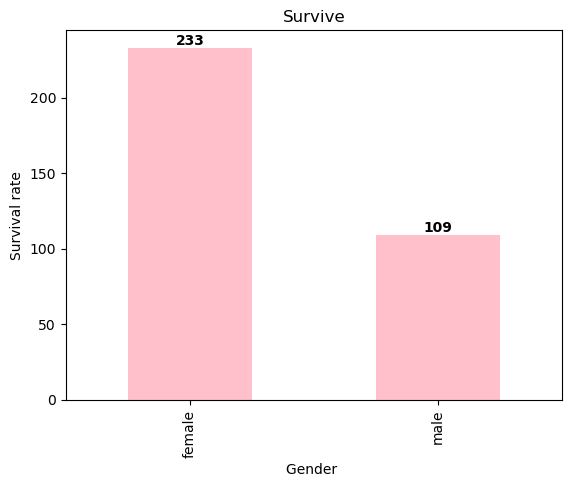

In [17]:
a=Survived.plot(kind="bar",color="pink")
plt.xlabel("Gender ")
plt.ylabel("Survival rate")
plt.title("Survive")
for index,value in enumerate(Survived):
    plt.text(index,value,str(value),ha="center",va="bottom",fontsize=10,fontweight="bold")
plt.show()

## Observation: Visualizing Survival by Gender

- Plotted a bar chart using `Survived.plot(kind="bar", color="pink")` to compare total survivors between males and females.
- Added axis labels and a title to clearly communicate the chart's meaning.
- Annotated each bar with the exact survival count using `plt.text()` for better readability and presentation.

In [18]:
Survive_death=data.groupby("Sex")["Survived"].value_counts()
Survive_death

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

## Observation: Survival Breakdown by Gender

- Used `data.groupby("Sex")["Survived"].value_counts()` to count how many males and females survived (`Survived = 1`) or died (`Survived = 0`).
- Assigned the result to `Survive_death` and displayed it to show both survival and death counts per gender.
- This breakdown helps compare survival rates and mortality across genders, revealing patterns in passenger outcomes.

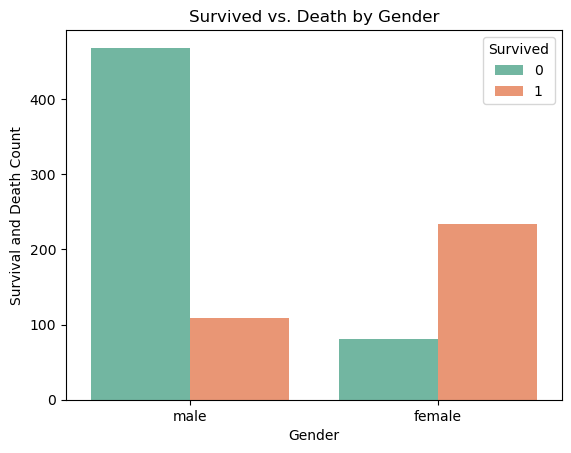

In [19]:
sns.countplot(x="Sex", hue="Survived", data=data, palette="Set2")
plt.xlabel("Gender")
plt.ylabel("Survival and Death Count") 
plt.title("Survived vs. Death by Gender")
plt.show()



## Observation: Countplot of Survival by Gender

- Used `sns.countplot()` with `x="Sex"` and `hue="Survived"` to visualize the number of survivors and deaths for each gender.
- Applied `palette="Set2"` for a clean color scheme and labeled axes and title for clarity.
- This plot shows both survival (`Survived = 1`) and death (`Survived = 0`) counts side-by-side, making gender-based outcome comparisons easy to interpret.

In [20]:
pclass=data["Pclass"].value_counts()
pclass

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

## Observation: Passenger Class Distribution

- Used `data["Pclass"].value_counts()` to count how many passengers belong to each class (1st, 2nd, 3rd).
- Assigned the result to a variable named `pclass` and displayed it to observe class-wise distribution.
- Helps understand the socioeconomic makeup of the passengers — typically more people traveled in 3rd class.

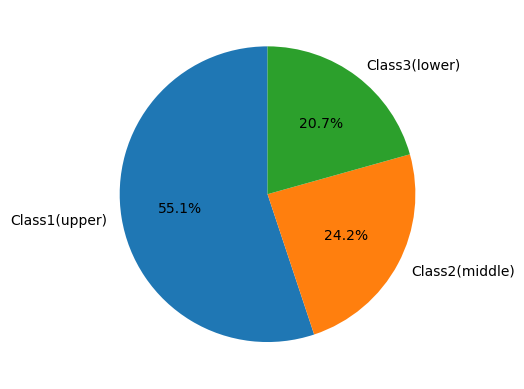

In [21]:
labels=["Class1(upper)","Class2(middle)","Class3(lower)"]
plt.pie(pclass,labels=labels,autopct="%1.1f%%",startangle=90)
plt.show()

## Observation: Pie Chart of Passenger Class Distribution

- Used `plt.pie()` to visualize the proportion of passengers in each class (1st, 2nd, 3rd) with custom labels.
- Applied `autopct="%1.1f%%"` to display percentage values and `startangle=90` for a rotated layout.
- This chart helps highlight that the majority of passengers traveled in 3rd class, reflecting socioeconomic diversity aboard the Titanic.

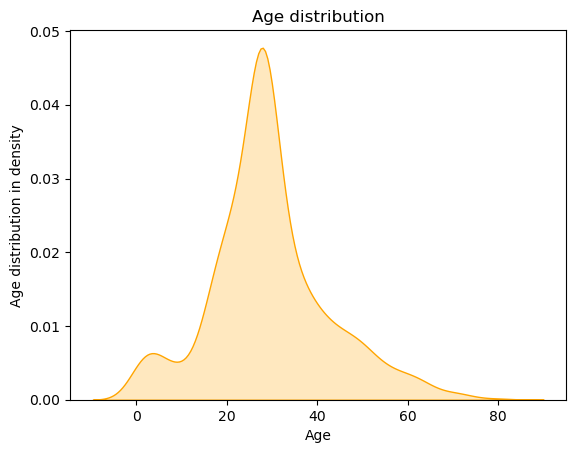

In [22]:
sns.kdeplot(data["Age"],fill=True,color="orange")
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Age distribution in density")
plt.show()

## Observation: Age Distribution Using KDE Plot

- Used `sns.kdeplot()` with `fill=True` to create a smooth density curve showing how passenger ages are distributed.
- Set `color="orange"` for visual appeal and added axis labels and a title for clarity.
- This plot helps identify age concentration patterns, such as peaks around young adults or children, and reveals the overall shape of the age distribution.

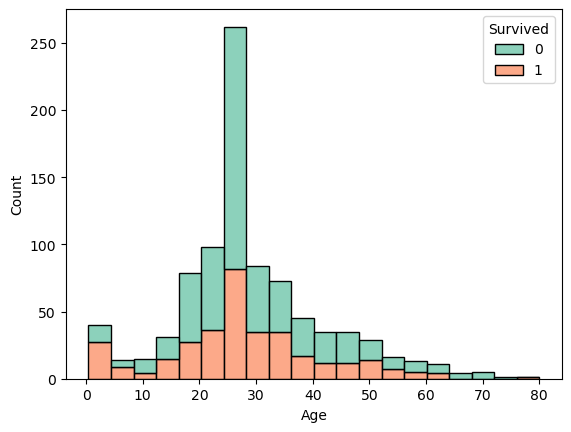

In [23]:
sns.histplot(data=data,x="Age",hue="Survived",bins=20,multiple="stack",palette="Set2")
plt.show()

## Observation: Age Distribution by Survival Status

- Used `sns.histplot()` with `hue="Survived"` and `multiple="stack"` to visualize how age is distributed among survivors and non-survivors.
- Set `bins=20` for granularity and applied `palette="Set2"` for clear color separation.
- This plot reveals age-based survival patterns — for example, higher survival among children or young adults compared to older passengers.

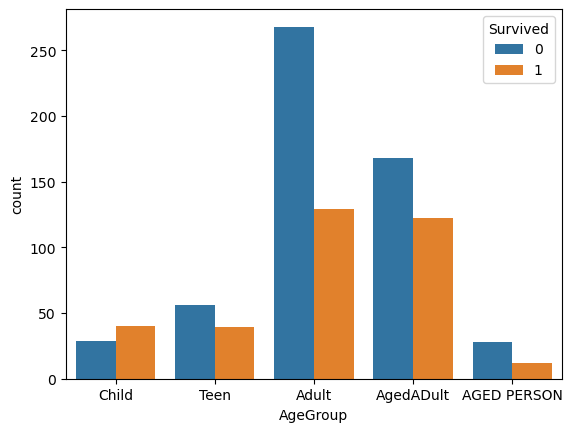

In [24]:
data["AgeGroup"]=pd.cut(data["Age"],bins=(0,12,19,29,55,90),labels=["Child","Teen","Adult","AgedADult","AGED PERSON"])
sns.countplot(x="AgeGroup",hue="Survived",data=data)
plt.show()

## Observation: Survival by Age Group

- Created a new column `AgeGroup` using `pd.cut()` to categorize ages into bins: Child, Teen, Adult, AgedAdult, and AGED PERSON.
- Used `sns.countplot()` with `x="AgeGroup"` and `hue="Survived"` to visualize survival and death counts across age categories.
- This plot helps reveal which age groups had higher survival rates — often showing better outcomes for children and young adults.

## Observation Summary

- **Missing Values**: Identified and visualized missing data using a red bar chart. Dropped the 'Cabin' column due to excessive nulls. Filled missing values in 'Age' with the median and in 'Embarked' with the mode.
- **Survival Analysis**:
  - Grouped and visualized survival counts by gender using bar charts and countplots.
  - Found that females had a higher survival count than males.
- **Class Distribution**:
  - Analyzed passenger class using `value_counts()` and a pie chart.
  - Majority of passengers were in 3rd class, indicating a lower socioeconomic group.
- **Age Distribution**:
  - Used KDE and stacked histograms to explore age patterns.
  - Created age bins (Child, Teen, Adult, AgedAdult, AGED PERSON) and visualized survival across these groups.
  - Children and young adults showed higher survival rates.

## Final Conclusion

- **Gender Impact**: Females had significantly higher survival rates, suggesting prioritization during evacuation.
- **Class Influence**: Passengers in 1st class had better survival outcomes, highlighting class-based disparities.
- **Age Factor**: Younger passengers, especially children, had better chances of survival.
- **Data Cleaning**: Missing values were handled effectively, ensuring reliable analysis.

This analysis reveals how survival on the Titanic was influenced by **gender, class, and age**, with clear patterns emerging from the visualizations and grouped summaries.